In [2]:
import json
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

In [3]:
with open("./out2.json") as fp:
    data = json.load(fp)

In [4]:
problem_type = {}
for i in range(1,17):
    problem_type[i] = []

for csv in data["hard_instances"]:
    problem_type[csv["type"]].extend(csv["instances"])

for csv in data["small_coefficients"]:
    problem_type[csv["type"]].extend(csv["instances"])
    
for csv in data["large_coefficients"]:
    problem_type[csv["type"]].extend(csv["instances"])

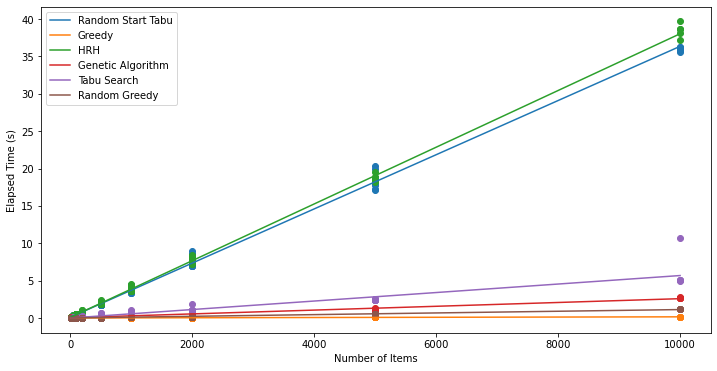

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
t = 16
ns = np.array([instance["n"] for instance in problem_type[t]])
cs = np.array([instance["c"] for instance in problem_type[t]])
random_tabu_time = [instance["random_tabu_time"] for instance in problem_type[t]]
greedy_time = [instance["greedy_time"] for instance in problem_type[t]]
hrh_time = [instance["hrh_time"] for instance in problem_type[t]]
ga_time = [instance["ga_time"] for instance in problem_type[t]]
tabu_time = [instance["tabu_time"] for instance in problem_type[t]]
random_greedy_time = [instance["random_greedy_time"] for instance in problem_type[t]]


ax.scatter(ns, random_tabu_time)
ax.scatter(ns, greedy_time)
ax.scatter(ns, hrh_time)
ax.scatter(ns, ga_time)
ax.scatter(ns, tabu_time)
ax.scatter(ns, random_greedy_time)

ax.plot(np.unique(ns), np.poly1d(np.polyfit(ns, random_tabu_time, 1))(np.unique(ns)), label="Random Start Tabu")
ax.plot(np.unique(ns), np.poly1d(np.polyfit(ns, greedy_time, 1))(np.unique(ns)), label="Greedy")
ax.plot(np.unique(ns), np.poly1d(np.polyfit(ns, hrh_time, 1))(np.unique(ns)), label="HRH")
ax.plot(np.unique(ns), np.poly1d(np.polyfit(ns, ga_time, 1))(np.unique(ns)), label="Genetic Algorithm")
ax.plot(np.unique(ns), np.poly1d(np.polyfit(ns, tabu_time, 1))(np.unique(ns)), label="Tabu Search")
ax.plot(np.unique(ns), np.poly1d(np.polyfit(ns, random_greedy_time, 1))(np.unique(ns)), label="Random Greedy")
ax.set_xlabel("Number of Items")
ax.set_ylabel("Elapsed Time (s)")
ax.legend()


Text(0, 0.5, 'Percent Error (%)')

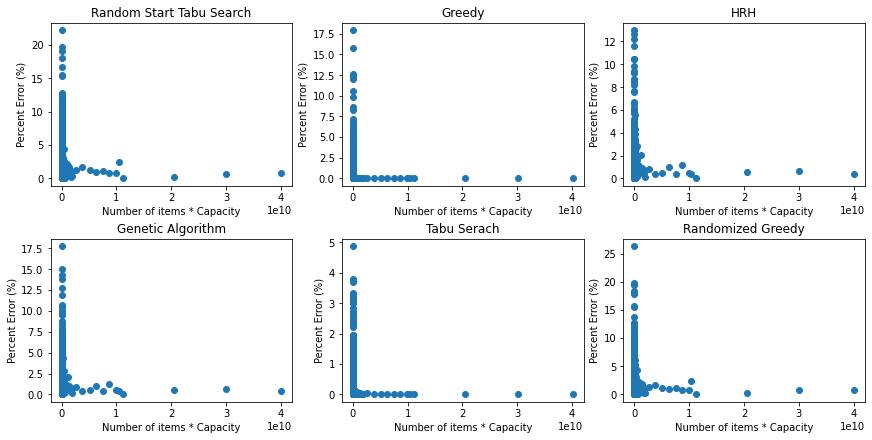

In [6]:
fig, ax = plt.subplots(figsize=(12,6), nrows=2, ncols=3, constrained_layout=True)
t = 16


ns = np.array([instance["n"] for instance in problem_type[t]])
cs = np.array([instance["c"] for instance in problem_type[t]])
opts = np.array([instance["opt"] for instance in problem_type[t]])
random_tabu_sol = np.abs(np.array([instance["random_tabu_sol"] for instance in problem_type[t]])/opts-1)
greedy_sol = np.abs(np.array([instance["greedy_sol"] for instance in problem_type[t]])/opts -1)
hrh_sol = np.abs(np.array([instance["hrh_sol"] for instance in problem_type[t]])/opts -1)
ga_sol = np.abs(np.array([instance["ga_sol"] for instance in problem_type[t]])/opts -1)
tabu_sol = np.abs(np.array([instance["tabu_sol"] for instance in problem_type[t]])/opts -1)
random_greedy_sol = np.abs(np.array([instance["random_greedy_sol"] for instance in problem_type[t]])/opts -1)

cutoff = 0
ax[0][0].scatter((ns*cs)[ns*cs > cutoff], (random_tabu_sol*100)[ns*cs > cutoff])
ax[0][1].scatter((ns*cs)[ns*cs > cutoff], (greedy_sol*100)[ns*cs > cutoff])
ax[0][2].scatter((ns*cs)[ns*cs > cutoff], (hrh_sol*100)[ns*cs > cutoff])
ax[1][0].scatter((ns*cs)[ns*cs > cutoff], (ga_sol*100)[ns*cs > cutoff])
ax[1][1].scatter((ns*cs)[ns*cs > cutoff], (tabu_sol*100)[ns*cs > cutoff])
ax[1][2].scatter((ns*cs)[ns*cs > cutoff], (random_greedy_sol*100)[ns*cs > cutoff])

ax[0][0].set_title("Random Start Tabu Search")
ax[0][1].set_title("Greedy")
ax[0][2].set_title("HRH")
ax[1][0].set_title("Genetic Algorithm")
ax[1][1].set_title("Tabu Serach")
ax[1][2].set_title("Randomized Greedy")

ax[0][0].set_xlabel("Number of items * Capacity")
ax[0][1].set_xlabel("Number of items * Capacity")
ax[0][2].set_xlabel("Number of items * Capacity")
ax[1][0].set_xlabel("Number of items * Capacity")
ax[1][1].set_xlabel("Number of items * Capacity")
ax[1][2].set_xlabel("Number of items * Capacity")

ax[0][0].set_ylabel("Percent Error (%)")
ax[0][1].set_ylabel("Percent Error (%)")
ax[0][2].set_ylabel("Percent Error (%)")
ax[1][0].set_ylabel("Percent Error (%)")
ax[1][1].set_ylabel("Percent Error (%)")
ax[1][2].set_ylabel("Percent Error (%)")

In [7]:
with open("./out_dp2.json") as fp:
    data = json.load(fp)


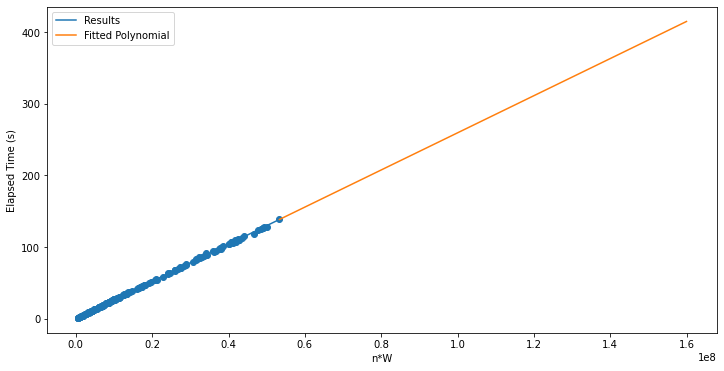

In [8]:
fig, ax = plt.subplots(figsize=(12,6))

ns = np.array([instance["n"] for instance in data])
cs = np.array([instance["c"] for instance in data])
dp_time = np.array([instance["dp_time"] for instance in data])

ax.scatter(ns*cs, dp_time)
ax.plot(np.unique(ns*cs), np.poly1d(np.polyfit(ns*cs, dp_time, 1))(np.unique(ns*cs)), label="Results")
ax.plot([53331300, 3*53331300], np.poly1d(np.polyfit(ns*cs, dp_time, 1))([53331300, 3*53331300]), label="Fitted Polynomial")
ax.set_xlabel("n*W")
ax.set_ylabel("Elapsed Time (s)")

ax.legend()


In [9]:
results = np.zeros(shape=(13, 6))
c = 0
cutoff = (1/10**5)*10**10
for t in [1,2,3,4,5,6,9,11,12,13,14,15,16]:
    opts = np.array([instance["opt"] for instance in problem_type[t] if instance["c"] * instance["n"] < cutoff])
    random_tabu_sol = np.abs(np.mean(np.array([instance["random_tabu_sol"] for instance in problem_type[t] if instance["c"] * instance["n"] < cutoff])/opts -1) * 100)
    greedy_sol = np.abs(np.mean(np.array([instance["greedy_sol"] for instance in problem_type[t] if instance["c"] * instance["n"] < cutoff])/opts -1) * 100)
    hrh_sol = np.abs(np.mean(np.array([instance["hrh_sol"] for instance in problem_type[t] if instance["c"] * instance["n"] < cutoff])/opts -1) * 100)
    ga_sol = np.abs(np.mean(np.array([instance["ga_sol"] for instance in problem_type[t] if instance["c"] * instance["n"] < cutoff])/opts -1) * 100)
    tabu_sol = np.abs(np.mean(np.array([instance["tabu_sol"] for instance in problem_type[t] if instance["c"] * instance["n"] < cutoff])/opts -1) * 100)
    random_greedy_sol = np.abs(np.mean(np.array([instance["random_greedy_sol"] for instance in problem_type[t] if instance["c"] * instance["n"] < cutoff])/opts -1) * 100)
    results[c][0] = random_tabu_sol
    results[c][1] = greedy_sol
    results[c][2] = hrh_sol
    results[c][3] = ga_sol
    results[c][4] = tabu_sol
    results[c][5] = random_greedy_sol
    c += 1

results = pd.DataFrame(results, columns=['Rand Tabu', 'Greedy', 'HRH', 'GA', 'Tabu', 'Rand Greedy'], 
                        index=["UNCOR", "WCOR", "SCOR", "ISCOR", "ASCOR", "SUBSUM", "SIMW", "UNCORS", 
                        "WCORS", "SCORS", "MSTR", "PCEIL", "CIRCLE"])

/usr/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [54]:
print(results.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Rand Tabu &    Greedy &       HRH &        GA &      Tabu &  Rand Greedy \\
\midrule
UNCOR  &   0.112403 &  1.585058 &  0.000000 &  0.523963 &  0.000000 &     1.101504 \\
WCOR   &   2.405433 &  2.142003 &  1.672713 &  6.455835 &  1.631774 &     8.996397 \\
SCOR   &   5.216899 &  5.811244 &  3.036972 &  4.294800 &  2.082062 &     5.677888 \\
ISCOR  &   3.005413 &  2.926180 &  0.567937 &  3.080644 &  2.881044 &     3.005413 \\
ASCOR  &   9.847010 &  3.198333 &  6.419899 &  7.816517 &  0.945217 &    10.779122 \\
SUBSUM &   0.000000 &  1.698490 &  0.000000 &  0.064451 &  0.178302 &     0.114886 \\
SIMW   &        NaN &       NaN &       NaN &       NaN &       NaN &          NaN \\
UNCORS &   0.000000 &  2.392647 &  0.000000 &  0.595970 &  0.146042 &     3.030475 \\
WCORS  &   0.023872 &  3.232548 &  0.094404 &  0.694888 &  0.677505 &     1.381020 \\
SCORS  &   0.200436 &  1.976897 &  0.024818 &  0.659640 &  0.206772 &     1.540183 \\
MSTR   &   2.48

Text(0, 0.5, 'Percent Error (%)')

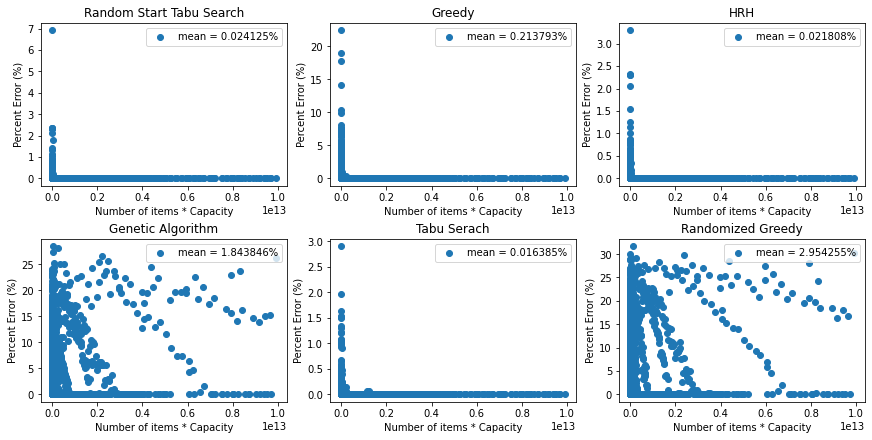

In [10]:
fig, ax = plt.subplots(figsize=(12,6), nrows=2, ncols=3, constrained_layout=True)
t = 16

cs = []
opts = []
random_tabu_sol = []
greedy_sol = []
hrh_sol = []
ga_sol = []
tabu_sol = []
random_greedy_sol = []
ns = []


for t in [6,9,15]:
    ns.extend([instance["n"] for instance in problem_type[t]])
    cs.extend([instance["c"] for instance in problem_type[t]])
    opts.extend([instance["opt"] for instance in problem_type[t]])
    random_tabu_sol.extend([instance["random_tabu_sol"] for instance in problem_type[t]])
    greedy_sol.extend([instance["greedy_sol"] for instance in problem_type[t]])
    hrh_sol.extend([instance["hrh_sol"] for instance in problem_type[t]])
    ga_sol.extend([instance["ga_sol"] for instance in problem_type[t]])
    tabu_sol.extend([instance["tabu_sol"] for instance in problem_type[t]])
    random_greedy_sol.extend([instance["random_greedy_sol"] for instance in problem_type[t]])

opts = np.array(opts)
ns = np.array(ns)
cs = np.array(cs)
random_tabu_sol = np.abs(np.array(random_tabu_sol)/opts - 1)
greedy_sol = np.abs(np.array(greedy_sol)/opts - 1)
hrh_sol = np.abs(np.array(hrh_sol)/opts - 1)
ga_sol = np.abs(np.array(ga_sol)/opts - 1)
tabu_sol = np.abs(np.array(tabu_sol)/opts - 1)
random_greedy_sol = np.abs(np.array(random_greedy_sol)/opts - 1)


cutoff = 10**13
lower = 0
ax[0][0].scatter((ns*cs)[(ns*cs < cutoff) & (ns*cs > lower)], (random_tabu_sol*100)  [(ns*cs < cutoff) & (ns*cs > lower)], label=f"mean = {np.mean((random_tabu_sol*100)  [(ns*cs < cutoff) & (ns*cs > lower)]):.6f}%")
ax[0][1].scatter((ns*cs)[(ns*cs < cutoff) & (ns*cs > lower)], (greedy_sol*100)       [(ns*cs < cutoff) & (ns*cs > lower)], label=f"mean = {np.mean((greedy_sol*100)       [(ns*cs < cutoff) & (ns*cs > lower)]):.6f}%")
ax[0][2].scatter((ns*cs)[(ns*cs < cutoff) & (ns*cs > lower)], (hrh_sol*100)          [(ns*cs < cutoff) & (ns*cs > lower)], label=f"mean = {np.mean((hrh_sol*100)          [(ns*cs < cutoff) & (ns*cs > lower)]):.6f}%")
ax[1][0].scatter((ns*cs)[(ns*cs < cutoff) & (ns*cs > lower)], (ga_sol*100)           [(ns*cs < cutoff) & (ns*cs > lower)], label=f"mean = {np.mean((ga_sol*100)           [(ns*cs < cutoff) & (ns*cs > lower)]):.6f}%")
ax[1][1].scatter((ns*cs)[(ns*cs < cutoff) & (ns*cs > lower)], (tabu_sol*100)         [(ns*cs < cutoff) & (ns*cs > lower)], label=f"mean = {np.mean((tabu_sol*100)         [(ns*cs < cutoff) & (ns*cs > lower)]):.6f}%")
ax[1][2].scatter((ns*cs)[(ns*cs < cutoff) & (ns*cs > lower)], (random_greedy_sol*100)[(ns*cs < cutoff) & (ns*cs > lower)], label=f"mean = {np.mean((random_greedy_sol*100)[(ns*cs < cutoff) & (ns*cs > lower)]):.6f}%")
ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()
ax[0][0].set_title("Random Start Tabu Search")
ax[0][1].set_title("Greedy")
ax[0][2].set_title("HRH")
ax[1][0].set_title("Genetic Algorithm")
ax[1][1].set_title("Tabu Serach")
ax[1][2].set_title("Randomized Greedy")




ax[0][0].set_xlabel("Number of items * Capacity")
ax[0][1].set_xlabel("Number of items * Capacity")
ax[0][2].set_xlabel("Number of items * Capacity")
ax[1][0].set_xlabel("Number of items * Capacity")
ax[1][1].set_xlabel("Number of items * Capacity")
ax[1][2].set_xlabel("Number of items * Capacity")

ax[0][0].set_ylabel("Percent Error (%)")
ax[0][1].set_ylabel("Percent Error (%)")
ax[0][2].set_ylabel("Percent Error (%)")
ax[1][0].set_ylabel("Percent Error (%)")
ax[1][1].set_ylabel("Percent Error (%)")
ax[1][2].set_ylabel("Percent Error (%)")

In [106]:
np.mean((random_tabu_sol*100)  [(ns*cs < cutoff) & (ns*cs > lower)])

0.0033661419553696523

In [107]:
np.mean((tabu_sol*100)         [(ns*cs < cutoff) & (ns*cs > lower)])

0.006581192746557491

In [66]:
cutoff

8120